Возьмите датасет https://www.kaggle.com/gpreda/covid-world-vaccination-progress 
Постройте диаграмму рассеяния в осях "число доз - число вакцинированных на 1 млн", 
метки точек - названия стран. Ограничтесь 20 странами с самым большим количеством доз вакцин

{'United States': [1070684865.0, 851005685.0], 'United Kingdom': [347188795.0, 328734963.0], 'England': [298411233.0, 281247874.0], 'Israel': [191526274.0, 134479695.0], 'Germany': [94900496.0, 73139952.0], 'Brazil': [79281945.0, 77391204.0], 'Italy': [77925275.0, 55355155.0], 'France': [55348556.0, 48882959.0], 'Spain': [43568885.0, 32304741.0], 'Poland': [40691689.0, 32447693.0], 'Turkey': [24975764.0, 21727193.0], 'Romania': [24546761.0, 19070106.0], 'Scotland': [23427184.0, 23125694.0], 'Mexico': [23095797.0, 21544967.0], 'Indonesia': [19868282.0, 15679784.0], 'Chile': [19101564.0, 18404772.0], 'Wales': [15133618.0, 15062528.0], 'Belgium': [11847136.0, 9627661.0], 'Argentina': [11290783.0, 7968946.0], 'Denmark': [10595754.0, 7836327.0]}


<function matplotlib.pyplot.show(close=None, block=None)>

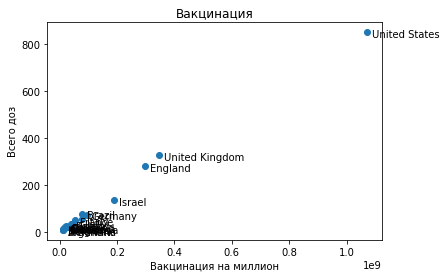

In [1]:
from matplotlib import pyplot as plt
import csv
from copy import deepcopy

results = []
with open('country_vaccinations.csv') as File:
    reader = csv.DictReader(File)
    for row in reader:
        results.append(row)
        
vaccines = dict()

for dic in results:
    if dic["total_vaccinations"] != '' and dic["people_vaccinated"] != '':
        if dic["country"] in vaccines:
            vaccines[dic["country"]][0] += float(dic["total_vaccinations"])
            vaccines[dic["country"]][1] += float(dic["people_vaccinated"])
        else:
            vaccines[dic["country"]] = [float(dic["total_vaccinations"]), float(dic["people_vaccinated"])]

max_countries = dict()
for _ in range(20):
    max_k = max(vaccines, key=vaccines.get)
    max_countries[max_k] = vaccines[max_k]
    vaccines.pop(max_k)
print(max_countries)

countries = list(max_countries.keys())
per_million = list(x[1]/10**6 for x in max_countries.values())
vac = list(x[0] for x in max_countries.values())

plt.scatter(vac, per_million, marker = 'o')
for vac, per_million, countries in zip(vac, per_million, countries):
    plt.annotate(countries, 
                 xy = (vac, per_million), # задаем метку
                 xytext = (5,-5), # смещаем метку
                 textcoords = 'offset points')
plt.title("Вакцинация")
plt.ylabel("Всего доз")
plt.xlabel("Вакцинация на миллион")
plt.show

За 2020-21 год сформируйте 3-мерный датасет из данных о курсе акций Газпрома, Сбербанка и ВТБ. 
Выберите периоды согласованного падения и роста акций (когда все три ряда данных, соответственно, 
не увеличивались или не уменьшались). Выведите список кортежей (начало периода, конец периода, рост/падение)

In [2]:
import pandas as pd
    
gz_ = pd.read_excel(r'gazprom-moscow-exchange.xlsx', sheet_name = 'list1')
sb_ = pd.read_excel(r'sberbank-moscow-exchange.xlsx', sheet_name = 'list1')
vtb_ = pd.read_excel(r'vtb-moscow-exchange.xlsx', sheet_name = 'list1')

akc = []
data = []
for _, _, _ in zip(gz_, sb_, vtb_):
    for i in range(len(gz_['Дата'])):
        data.append(gz_['Дата'][i])
        akc.append([gz_['Цена last'][i], gz_['Цена last'][i], gz_['Цена last'][i]])

rost_padenie = []
for i in range(1, len(akc)):
    if akc[i] < akc[i-1]:
        rost_padenie.append([data[i-1], data[i], 'Падение'])
    else:
        rost_padenie.append([data[i-1], data[i], 'Рост'])

#print(rost_padenie)
data_set = []
i = 1
while i < len(rost_padenie):
    first_data = rost_padenie[i-1]
    while i < len(rost_padenie) and first_data[2] == rost_padenie[i][2]: i+=1
    first_data[1] = rost_padenie[i-1][1]
    data_set.append(first_data)
    i+=2
for i in range(len(data_set)):
    print(data_set[i][1],' - ', data_set[i][0], '\t', data_set[i][2])

18.02.2021  -  20.02.2021 	 Падение
16.02.2021  -  17.02.2021 	 Рост
11.02.2021  -  15.02.2021 	 Падение
09.02.2021  -  10.02.2021 	 Рост
01.02.2021  -  08.02.2021 	 Падение
28.01.2021  -  29.01.2021 	 Рост
26.01.2021  -  27.01.2021 	 Рост
22.01.2021  -  25.01.2021 	 Падение
20.01.2021  -  21.01.2021 	 Рост
18.01.2021  -  19.01.2021 	 Рост
14.01.2021  -  15.01.2021 	 Рост
12.01.2021  -  13.01.2021 	 Рост
05.01.2021  -  11.01.2021 	 Падение
25.12.2020  -  04.01.2021 	 Падение
23.12.2020  -  24.12.2020 	 Рост
21.12.2020  -  22.12.2020 	 Падение
15.12.2020  -  18.12.2020 	 Падение
11.12.2020  -  14.12.2020 	 Рост
08.12.2020  -  10.12.2020 	 Падение
03.12.2020  -  07.12.2020 	 Падение
30.11.2020  -  02.12.2020 	 Падение
26.11.2020  -  27.11.2020 	 Падение
20.11.2020  -  25.11.2020 	 Падение
18.11.2020  -  19.11.2020 	 Рост
16.11.2020  -  17.11.2020 	 Рост
11.11.2020  -  13.11.2020 	 Падение
30.10.2020  -  10.11.2020 	 Падение
28.10.2020  -  29.10.2020 	 Падение
22.10.2020  -  27.10.2020 	 

20.01.2021  -  21.01.2021 	 Рост
18.01.2021  -  19.01.2021 	 Рост
14.01.2021  -  15.01.2021 	 Рост
12.01.2021  -  13.01.2021 	 Рост
05.01.2021  -  11.01.2021 	 Падение
25.12.2020  -  04.01.2021 	 Падение
23.12.2020  -  24.12.2020 	 Рост
21.12.2020  -  22.12.2020 	 Падение
15.12.2020  -  18.12.2020 	 Падение
11.12.2020  -  14.12.2020 	 Рост
08.12.2020  -  10.12.2020 	 Падение
03.12.2020  -  07.12.2020 	 Падение
30.11.2020  -  02.12.2020 	 Падение
26.11.2020  -  27.11.2020 	 Падение
20.11.2020  -  25.11.2020 	 Падение
18.11.2020  -  19.11.2020 	 Рост
16.11.2020  -  17.11.2020 	 Рост
11.11.2020  -  13.11.2020 	 Падение
30.10.2020  -  10.11.2020 	 Падение
28.10.2020  -  29.10.2020 	 Падение
22.10.2020  -  27.10.2020 	 Рост
20.10.2020  -  21.10.2020 	 Рост
16.10.2020  -  19.10.2020 	 Падение
14.10.2020  -  15.10.2020 	 Рост
12.10.2020  -  13.10.2020 	 Рост
08.10.2020  -  09.10.2020 	 Падение
06.10.2020  -  07.10.2020 	 Рост
01.10.2020  -  05.10.2020 	 Падение
29.09.2020  -  30.09.2020 	 Пад

In [3]:
gz_

,Дата,Bid,Ask,Цена open,Цена min,Цена max,Цена last,Цена avg,Оборот,Кол-во сделок
0,20.02.2021,226.36,226.40,226.40,225.00,227.10,226.40,225.84,1174253948,13564
1,19.02.2021,225.86,226.03,224.01,221.10,226.20,226.17,223.95,9388607302,57358
2,18.02.2021,225.21,225.22,229.00,224.05,229.00,224.74,226.14,8994608288,58370
3,17.02.2021,226.78,226.88,232.32,225.33,233.35,226.77,229.63,13493896896,76189
4,16.02.2021,232.33,232.45,230.00,227.57,233.22,232.40,230.97,18689733891,91885
...,...,...,...,...,...,...,...,...,...,...
280,10.01.2020,251.46,251.67,254.00,251.20,254.60,251.90,252.75,7220010840,53957
281,09.01.2020,254.57,254.63,255.69,251.82,256.68,254.07,254.17,8445262064,50700
282,08.01.2020,255.30,255.35,256.25,254.77,257.32,255.79,255.64,6587177769,39142
283,06.01.2020,255.76,255.83,259.00,254.80,259.00,256.55,256.12,7209355959,38688


С помощью генератора ПСЧ (модуль random) создайте выборку из 1000 отсчетов, 
лежащих в интервале вещественных чисел от 0 до 1. Выведите список номеров отсчетов, 
которые заканчивают серию, обладающую свойством "длина серии 5, серия строго убывающая"

In [29]:
import random as rand
ots = list(rand.random() for _ in range(1000))
k = []
for i in range(5,1000):
    if ots[i-5:i] == sorted(ots[i-5:i], reverse=True):
        k.append(i)
        print(ots[i-5:i])
print(k)

[0.7716409791770898, 0.7369287921467421, 0.6767870184475038, 0.298262666652919, 0.05299283499984342]
[0.6196052768391601, 0.5417114387555774, 0.5318081408555927, 0.4022908511866171, 0.23060592128501312]
[0.9756622962607854, 0.4221617332024522, 0.2553194674668805, 0.06666208092742087, 0.005938976933897222]
[0.8651917200651416, 0.6184948946042064, 0.5567581635826742, 0.45736920343827336, 0.361211630347938]
[0.6184948946042064, 0.5567581635826742, 0.45736920343827336, 0.361211630347938, 0.08017548439206268]
[0.9852375756120079, 0.8296166733757011, 0.6851053016274757, 0.33864885371937326, 0.28961564304233134]
[0.9731823873570662, 0.6826912269750353, 0.6195396919861631, 0.34792785090144474, 0.1819952089664857]
[0.9240075644491746, 0.9098359356643042, 0.6392042667099512, 0.5356440413268034, 0.1281533380721972]
[0.8611718383748651, 0.4646503091492957, 0.32505602194695704, 0.11964116665820279, 0.1132582817599801]
[234, 270, 288, 318, 319, 479, 519, 581, 996]


Для рассмотренного в материале кейса с биатлонистом, пусть эксперимент состоял из 5 серий по 50 выстрелов. 
Промахов было 5,4,6,4,7. Верна ли гипотеза по уровню значимости 5% в этом случае и какова мощность проверки? 

In [13]:
import math as m
# нормальное распределение – плотность вероятности
def rho_norm(x, mu=0, s=1):
    return 1/m.sqrt(2*pi*s)*m.exp(-(x-mu)**2/2/s**2)
# нормальное распределение – функция распределения
def f_norm(x, mu=0, s=1):
    return (1+m.erf((x-mu)/m.sqrt(2)/s))/2
# обратная функция нормального распределения
def inv_f_norm(p, mu, s, t=0.001):
# сначала стандартизуем
    if mu != 0 or s != 1: return mu + s * inv_f_norm(p,0,1,t)
  # ищем в полосе значений -100…100 (можно изменить)
    low_x, low_p = -100.0, 0
    hi_x, hi_p = 100.0, 1
    while hi_x - low_x > t:
        mid_x = (low_x + hi_x)/2
        mid_p = f_norm(mid_x)
        if mid_p < p: low_x, low_p = mid_x, mid_p
        elif mid_p > p: hi_x, hi_p = mid_x, mid_p
        else: break
    return mid_x
#кол-во попыток
n = 5*50
#вероятность промахов
p = (5+4+6+4+7)/n
#мат ожидоние mu
nu = n*p
#стандартное отклонение
o = m.sqrt(mu*(1-p))
#интервал подтверждения гипотезы
left = inv_f_norm(0.025,nu,o)
right = 2*nu - inv_f_norm(0.025,nu,o)

# ошибка первого рода
if round(f_norm(right,nu,o)-f_norm(left,nu,o),2) == 0.95:
#ошибка второго родa
    p1 = 0.95*p
    p2 = 1.05*p
    nu1 = p1*n
    nu2 = p2*n
    o1 = m.sqrt(n*p1*(1-p1))
    o2 = m.sqrt(n*p2*(1-p2))
    w1 = 1 - round(f_norm(right,nu1,o1)-f_norm(left,nu1,o1),2)
    w2 = 1 - round(f_norm(right,nu2,o2)-f_norm(left,nu2,o2),2)
    #мощность проверки - среднее зн-ие мощностей
    print(f"Гипотеза по уровню значимости 5% верна, мощность проверки равна {round((w1+w2)*100/2,2)}%")
else: print("Гипотеза не верна")

Гипотеза по уровню значимости 5% верна, мощность проверки равна 5.5%
